# Experiments and Causal Inference
## Final Project Notebook

#### Code for daily randomizations

In [125]:
x = np.repeat([0,1], repeats= [29,29])
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [126]:
np.random.shuffle(x)
x

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

### Reading in the treatment assignment file

In [2]:
treat_raw = pd.read_csv('data/treatment_assignment_anonimized.csv')

In [3]:
treat_raw.head()

,respondent_id,What timezone are you in?,Country,Enter your Age,What is your current profession? Please mention degree and year if you are a student,How many hours a night do you sleep on average?,What kind of a sleeper are you?,How many alarms do you typically keep at night?,How close is your alarm device to you when you sleep?,Do you have roommates whose actions disturb your sleep?,...,Do you have a kid under 4 years old?,Where do you live?,11/29/18,11/30/18,12/1/18,12/2/18,12/3/18,12/4/18,12/5/18,12/6/18
0,1,CST,USA,25.0,Business Analyst,9.0,Deep Sleeper,2,Within Arm's reach,No,...,No,Apartment,0.0,0.0,1.0,0.0,1,1,1,0
1,2,CST,USA,27.0,Data Scientist,8.0,Light Sleeper,2,Within Arm's reach,No,...,No,Apartment,0.0,0.0,1.0,0.0,0,1,1,1
2,3,Pacific Standard Time,USA,27.0,Student - MIMS 19,7.5,Deep Sleeper,2,Within Arm's reach,Yes,...,No,Independent House,0.0,0.0,0.0,1.0,1,1,1,0
3,4,Pacific,USA,29.0,Product Manager,6.0,Light Sleeper,1,Within Arm's reach,No,...,No,Apartment,0.0,0.0,1.0,0.0,0,1,0,1
4,5,Pacific,USA,25.0,MIMS ‘19,8.5,Deep Sleeper,1,Have to get out of bed,No,...,No,Apartment,0.0,1.0,0.0,1.0,0,0,0,1


In [4]:
treat_1 = treat_raw.iloc[:,[0,-8,-7,-6,-5,-4,-3,-2,-1]]
treat_1.head()

,respondent_id,11/29/18,11/30/18,12/1/18,12/2/18,12/3/18,12/4/18,12/5/18,12/6/18
0,1,0.0,0.0,1.0,0.0,1,1,1,0
1,2,0.0,0.0,1.0,0.0,0,1,1,1
2,3,0.0,0.0,0.0,1.0,1,1,1,0
3,4,0.0,0.0,1.0,0.0,0,1,0,1
4,5,0.0,1.0,0.0,1.0,0,0,0,1


In [5]:
treat_2 = treat_1.melt('respondent_id', value_name = 'treat?', var_name = 'date')
treat_2.head(20)

,respondent_id,date,treat?
0,1,11/29/18,0.0
1,2,11/29/18,0.0
2,3,11/29/18,0.0
3,4,11/29/18,0.0
4,5,11/29/18,0.0
5,6,11/29/18,0.0
6,7,11/29/18,1.0
7,8,11/29/18,1.0
8,9,11/29/18,1.0
9,10,11/29/18,0.0


In [6]:
treat_2 = treat_2.dropna(axis = 0, how= 'any')
treat_2['treat?'] = treat_2['treat?'].astype('int')

In [7]:
treat_2.dtypes

respondent_id     int64
date             object
treat?            int64
dtype: object

In [8]:
treat_2.head()

,respondent_id,date,treat?
0,1,11/29/18,0
1,2,11/29/18,0
2,3,11/29/18,0
3,4,11/29/18,0
4,5,11/29/18,0


In [9]:
treat_raw.columns

Index(['respondent_id', 'What timezone are you in?', 'Country',
       'Enter your Age',
       'What is your current profession? Please mention degree and year if you are a student',
       'How many hours a night do you sleep on average?',
       'What kind of a sleeper are you?',
       'How many alarms do you typically keep at night?',
       'How close is your alarm device to you when you sleep?',
       'Do you have roommates whose actions disturb your sleep?',
       'Do you suffer from Insomnia?',
       'How much light comes into your bedroom in the morning?',
       'Do you hear traffic noises in your bedroom?',
       'Do you have a kid under 4 years old?', 'Where do you live?',
       '11/29/18', '11/30/18', '12/1/18', '12/2/18', '12/3/18', '12/4/18',
       '12/5/18', '12/6/18'],
      dtype='object')

In [10]:
treat_raw.iloc[:,0:-8].head()

,respondent_id,What timezone are you in?,Country,Enter your Age,What is your current profession? Please mention degree and year if you are a student,How many hours a night do you sleep on average?,What kind of a sleeper are you?,How many alarms do you typically keep at night?,How close is your alarm device to you when you sleep?,Do you have roommates whose actions disturb your sleep?,Do you suffer from Insomnia?,How much light comes into your bedroom in the morning?,Do you hear traffic noises in your bedroom?,Do you have a kid under 4 years old?,Where do you live?
0,1,CST,USA,25.0,Business Analyst,9.0,Deep Sleeper,2,Within Arm's reach,No,No,Medium,No,No,Apartment
1,2,CST,USA,27.0,Data Scientist,8.0,Light Sleeper,2,Within Arm's reach,No,No,Medium,No,No,Apartment
2,3,Pacific Standard Time,USA,27.0,Student - MIMS 19,7.5,Deep Sleeper,2,Within Arm's reach,Yes,No,Medium,No,No,Independent House
3,4,Pacific,USA,29.0,Product Manager,6.0,Light Sleeper,1,Within Arm's reach,No,No,Low,Yes,No,Apartment
4,5,Pacific,USA,25.0,MIMS ‘19,8.5,Deep Sleeper,1,Have to get out of bed,No,No,Medium,No,No,Apartment


In [11]:
treat_3 = treat_raw.iloc[:,0:-8]

In [12]:
treat_3.columns = ['respondent_id','cat_timezone','cat_country','age','cat_profession','avg_sleep','cat_sleep_type','cat_avg_alarms','cat_alarm_distance','cat_noisy_roomies',
                  'cat_insomnia','cat_room_light','cat_traffic_noise','cat_kid_under_4','cat_house_type']
treat_3.head()

,respondent_id,cat_timezone,cat_country,age,cat_profession,avg_sleep,cat_sleep_type,cat_avg_alarms,cat_alarm_distance,cat_noisy_roomies,cat_insomnia,cat_room_light,cat_traffic_noise,cat_kid_under_4,cat_house_type
0,1,CST,USA,25.0,Business Analyst,9.0,Deep Sleeper,2,Within Arm's reach,No,No,Medium,No,No,Apartment
1,2,CST,USA,27.0,Data Scientist,8.0,Light Sleeper,2,Within Arm's reach,No,No,Medium,No,No,Apartment
2,3,Pacific Standard Time,USA,27.0,Student - MIMS 19,7.5,Deep Sleeper,2,Within Arm's reach,Yes,No,Medium,No,No,Independent House
3,4,Pacific,USA,29.0,Product Manager,6.0,Light Sleeper,1,Within Arm's reach,No,No,Low,Yes,No,Apartment
4,5,Pacific,USA,25.0,MIMS ‘19,8.5,Deep Sleeper,1,Have to get out of bed,No,No,Medium,No,No,Apartment


In [13]:
treat_3['cat_profession'].unique()

array(['Business Analyst', 'Data Scientist', 'Student - MIMS 19',
       'Product Manager', 'MIMS ‘19', 'Student', 'Student ', 'MIMS',
       'degree', 'student, MIMS 20, First year',
       'Graduate Student - MIMS', 'MIMS, 2nd year', 'student',
       '2nd year Grad', 'MIMS 2019', 'MIMS 20', 'MIMS 1st year',
       'MIMS 19', 'Second year MIMS student', 'Pilot', 'IT professional',
       'Student : Bachelors degree ',
       '2nd year student studying Bachelor of Commerce / Laws',
       'Housewife', 'Top Management', 'Teacher', 'Author', 'BE',
       'Photographer', 'Sales Management', 'Dress designer', 'Retired ',
       'Doctor ', 'Assistant Professor', 'Business', 'Japanese tutor',
       'B.Tech-2022', 'Milk Business', 'Teaching', 'Doctor', 'Developer',
       'Design Engineer', 'PhD Student', 'PhD student',
       'International Law 2018', 'Home maker', 'Structural Engineer',
       'Unemployed', 'Engineer', 'Phd student first year',
       'People Manager', 'Software engineer'

In [14]:
def group_jobs(job):

    mapping = {
        'Business Analyst' : 'IT/Professional',
        'Data Scientist' : 'IT/Professional',
        'Student - MIMS 19' : 'Student', 
        'Product Manager' : 'IT/Professional',
        'MIMS ‘19' : 'Student',
        'Student' : 'Student',
        'Student ' : 'Student',
        'MIMS' : 'Student',
        'degree' : 'Student',
        'student, MIMS 20, First year' : 'Student',
        'Graduate Student - MIMS' : 'Student',
        'MIMS, 2nd year' : 'Student',
        'student' : 'Student',
        '2nd year Grad' : 'Student',
        'MIMS 2019' : 'Student',
        'MIMS 20' : 'Student',
        'MIMS 1st year' : 'Student',
        'MIMS 19' : 'Student',
        'Second year MIMS student' : 'Student',
        'Pilot' : 'Other',
        'IT professional' : 'IT/Professional',
        'Student : Bachelors degree ' : 'Student',
        '2nd year student studying Bachelor of Commerce / Laws' : 'Student',
        'Housewife' : 'Home_Maker',
        'Top Management' : 'Other',
        'Teacher' : 'Academic',
        'Author' : 'Academic',
        'BE' : 'IT/Professional',
        'Photographer' : 'Other',
        'Sales Management' : 'Other',
        'Dress designer' : 'Other',
        'Retired ' : 'Unemployed',
        'Doctor ' : 'Other',
        'Assistant Professor' : 'Academic',
        'Business' : 'Other',
        'Japanese tutor' : 'Academic',
        'B.Tech-2022' : 'Student',
        'Milk Business' : 'Other',
        'Teaching' : 'Academic',
        'Doctor' : 'Other',
        'Developer' : 'Other',
        'Design Engineer' : 'IT/Professional',
        'PhD Student' : 'Student',
        'PhD student' : 'Student',
        'International Law 2018' : 'Student',
        'Home maker' : 'Home_Maker',
        'Structural Engineer' : 'IT/Professional',
        'Unemployed' : 'Unemployed',
        'Engineer' : 'IT/Professional',
        'Phd student first year' : 'Student',
        'People Manager' : 'Other',
        'Software engineer' : 'IT/Professional',
        'Public health' : 'Other',
        'MIDS, incoming, started Sept 2018' : 'Student'
    }

    try:
        return mapping[job]
    except:
        return job

In [15]:
treat_3['cat_profession_group'] = treat_3['cat_profession'].apply(group_jobs)
treat_3.head()

,respondent_id,cat_timezone,cat_country,age,cat_profession,avg_sleep,cat_sleep_type,cat_avg_alarms,cat_alarm_distance,cat_noisy_roomies,cat_insomnia,cat_room_light,cat_traffic_noise,cat_kid_under_4,cat_house_type,cat_profession_group
0,1,CST,USA,25.0,Business Analyst,9.0,Deep Sleeper,2,Within Arm's reach,No,No,Medium,No,No,Apartment,IT/Professional
1,2,CST,USA,27.0,Data Scientist,8.0,Light Sleeper,2,Within Arm's reach,No,No,Medium,No,No,Apartment,IT/Professional
2,3,Pacific Standard Time,USA,27.0,Student - MIMS 19,7.5,Deep Sleeper,2,Within Arm's reach,Yes,No,Medium,No,No,Independent House,Student
3,4,Pacific,USA,29.0,Product Manager,6.0,Light Sleeper,1,Within Arm's reach,No,No,Low,Yes,No,Apartment,IT/Professional
4,5,Pacific,USA,25.0,MIMS ‘19,8.5,Deep Sleeper,1,Have to get out of bed,No,No,Medium,No,No,Apartment,Student


In [16]:
def deepsleep(c):
    if c['cat_sleep_type'] == 'Deep Sleeper':
        return 1
    elif c['cat_sleep_type'] == 'Light Sleeper':
        return 0
    else:
        return None

def alarm_near(c):
    if c['cat_alarm_distance'] == "Within Arm's reach":
        return 1
    elif c['cat_alarm_distance'] == 'Have to get out of bed':
        return 0
    else:
        return None

In [17]:
treat_3['cat_sleep_type'].unique()

array(['Deep Sleeper', 'Light Sleeper'], dtype=object)

In [18]:
treat_3['cat_deep_sleeper'] = treat_3.apply(deepsleep, axis=1)
treat_3['cat_alarm_nearby'] = treat_3.apply(alarm_near, axis=1)

In [19]:
treat_3.head()

,respondent_id,cat_timezone,cat_country,age,cat_profession,avg_sleep,cat_sleep_type,cat_avg_alarms,cat_alarm_distance,cat_noisy_roomies,cat_insomnia,cat_room_light,cat_traffic_noise,cat_kid_under_4,cat_house_type,cat_profession_group,cat_deep_sleeper,cat_alarm_nearby
0,1,CST,USA,25.0,Business Analyst,9.0,Deep Sleeper,2,Within Arm's reach,No,No,Medium,No,No,Apartment,IT/Professional,1,1.0
1,2,CST,USA,27.0,Data Scientist,8.0,Light Sleeper,2,Within Arm's reach,No,No,Medium,No,No,Apartment,IT/Professional,0,1.0
2,3,Pacific Standard Time,USA,27.0,Student - MIMS 19,7.5,Deep Sleeper,2,Within Arm's reach,Yes,No,Medium,No,No,Independent House,Student,1,1.0
3,4,Pacific,USA,29.0,Product Manager,6.0,Light Sleeper,1,Within Arm's reach,No,No,Low,Yes,No,Apartment,IT/Professional,0,1.0
4,5,Pacific,USA,25.0,MIMS ‘19,8.5,Deep Sleeper,1,Have to get out of bed,No,No,Medium,No,No,Apartment,Student,1,0.0


In [21]:
treat_4 = treat_3.iloc[:,[0,2,3,5,7,9,10,11,12,13,14,15,16,17]]

In [22]:
final_treat = treat_2.merge(treat_4,how = 'left', left_on= 'respondent_id', right_on= 'respondent_id')
treat_2.shape, final_treat.shape, treat_4.shape

((420, 3), (420, 16), (58, 14))

In [23]:
final_treat.head()

,respondent_id,date,treat?,cat_country,age,avg_sleep,cat_avg_alarms,cat_noisy_roomies,cat_insomnia,cat_room_light,cat_traffic_noise,cat_kid_under_4,cat_house_type,cat_profession_group,cat_deep_sleeper,cat_alarm_nearby
0,1,11/29/18,0,USA,25.0,9.0,2,No,No,Medium,No,No,Apartment,IT/Professional,1,1.0
1,2,11/29/18,0,USA,27.0,8.0,2,No,No,Medium,No,No,Apartment,IT/Professional,0,1.0
2,3,11/29/18,0,USA,27.0,7.5,2,Yes,No,Medium,No,No,Independent House,Student,1,1.0
3,4,11/29/18,0,USA,29.0,6.0,1,No,No,Low,Yes,No,Apartment,IT/Professional,0,1.0
4,5,11/29/18,0,USA,25.0,8.5,1,No,No,Medium,No,No,Apartment,Student,1,0.0


In [24]:
final_treat.date.unique()

array(['11/29/18', '11/30/18', '12/1/18', '12/2/18', '12/3/18', '12/4/18',
       '12/5/18', '12/6/18'], dtype=object)

In [25]:
daily_raw = pd.read_csv('data/daily_edited_anonimized.csv')
daily_raw.head()

,Timestamp,date,respondent_id,How many alarms did it take to wake up?,How refreshed do you feel now?,How alert do you feel right now?,How long did you sleep (in hh:mm),hours_slept,Did you do any strenuous activity yesterday (such as workout/gym etc.)?,How stressed were you last night?
0,2018/11/29 1:43:56 PM PST,11/29/18,11,Woke up before/without an alarm,Refreshed,Neutral,8:45,8.75,No,Somewhat Stressed
1,2018/11/30 8:40:26 AM PST,11/30/18,11,Woke up before/without an alarm,Refreshed,Neutral,6:40,6.66,No,Not at all stressed
2,2018/12/01 11:01:21 AM PST,12/1/18,11,1,Tired,Neutral,7:00,7.00,No,Not at all stressed
3,2018/12/02 10:16:54 AM PST,12/2/18,11,2,Refreshed,Neutral,7:45,7.75,No,Not at all stressed
4,2018/12/03 9:22:36 AM PST,12/3/18,11,1,Tired,Somewhat not alert,5:30,5.50,No,Neutral


In [26]:
daily_1 = daily_raw.iloc[:,[1,2,3,4,5,7,8,9]]
daily_1.head()

,date,respondent_id,How many alarms did it take to wake up?,How refreshed do you feel now?,How alert do you feel right now?,hours_slept,Did you do any strenuous activity yesterday (such as workout/gym etc.)?,How stressed were you last night?
0,11/29/18,11,Woke up before/without an alarm,Refreshed,Neutral,8.75,No,Somewhat Stressed
1,11/30/18,11,Woke up before/without an alarm,Refreshed,Neutral,6.66,No,Not at all stressed
2,12/1/18,11,1,Tired,Neutral,7.00,No,Not at all stressed
3,12/2/18,11,2,Refreshed,Neutral,7.75,No,Not at all stressed
4,12/3/18,11,1,Tired,Somewhat not alert,5.50,No,Neutral


In [27]:
daily_1.iloc[:,2].unique()

array(['Woke up before/without an alarm', '1', '2', '3', 'More than 4'],
      dtype=object)

In [28]:
daily_1.iloc[:,3].unique()

array(['Refreshed', 'Tired', 'Neutral', 'Very Tired', 'Very Refreshed'],
      dtype=object)

In [29]:
daily_1.iloc[:,4].unique()

array(['Neutral', 'Somewhat not alert', 'Somewhat Alert', 'Very Alert',
       'Not at all alert'], dtype=object)

In [30]:
daily_1.iloc[:,6].unique()

array(['No', 'Yes', nan], dtype=object)

In [31]:
daily_1.iloc[:,7].unique()

array(['Somewhat Stressed', 'Not at all stressed', 'Neutral',
       'Very Stressed', 'Somewhat not stressed'], dtype=object)

In [32]:
def snooze(c):
    if c['How many alarms did it take to wake up?'] == 'Woke up before/without an alarm':
        return 0
    elif c['How many alarms did it take to wake up?'] == '1':
        return 0
    else:
        return 1

def gym(c):
    if c['Did you do any strenuous activity yesterday (such as workout/gym etc.)?'] == 'Yes':
        return 1
    else:
        return 0      

In [33]:
daily_1['snoozed?'] = daily_1.apply(snooze, axis=1)
daily_1['activity_yesterday'] = daily_1.apply(gym, axis=1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
daily_1.head()

,date,respondent_id,How many alarms did it take to wake up?,How refreshed do you feel now?,How alert do you feel right now?,hours_slept,Did you do any strenuous activity yesterday (such as workout/gym etc.)?,How stressed were you last night?,snoozed?,activity_yesterday
0,11/29/18,11,Woke up before/without an alarm,Refreshed,Neutral,8.75,No,Somewhat Stressed,0,0
1,11/30/18,11,Woke up before/without an alarm,Refreshed,Neutral,6.66,No,Not at all stressed,0,0
2,12/1/18,11,1,Tired,Neutral,7.00,No,Not at all stressed,0,0
3,12/2/18,11,2,Refreshed,Neutral,7.75,No,Not at all stressed,1,0
4,12/3/18,11,1,Tired,Somewhat not alert,5.50,No,Neutral,0,0


In [35]:
def refresh(x):

    mapping = {
        'Very Tired' : 1,
        'Tired' : 2,
        'Neutral' : 3, 
        'Refreshed' : 4,
        'Very Refreshed' : 5,
    }

    try:
        return mapping[x]
    except:
        return x
    
def alert(x):

    mapping = {
        'Not at all alert' : 1,
        'Somewhat not alert' : 2,
        'Neutral' : 3, 
        'Somewhat Alert' : 4,
        'Very Alert' : 5,
    }

    try:
        return mapping[x]
    except:
        return x

def stress(x):

    mapping = {
        'Very Stressed' : 1,
        'Somewhat Stressed' : 2,
        'Neutral' : 3, 
        'Somewhat not stressed' : 4,
        'Not at all stressed' : 5,
    }

    try:
        return mapping[x]
    except:
        return x

In [36]:
daily_1.date.unique()

array(['11/29/18', '11/30/18', '12/1/18', '12/2/18', '12/3/18', '12/4/18',
       '12/5/18', '12/6/18'], dtype=object)

In [37]:
def saturday(c):
    if c['date'] == '12/1/18':
        return 1
    else:
        return 0 
    
def sunday(c):
    if c['date'] == '12/2/18':
        return 1
    else:
        return 0 
def weekend(c):
    if c['date'] == '12/1/18':
        return 1
    elif c['date'] == '12/2/18':
        return 1
    else:
        return 0 

In [38]:
daily_1['out_refresh'] = daily_1['How refreshed do you feel now?'].apply(refresh)
daily_1['out_alert'] = daily_1['How alert do you feel right now?'].apply(alert)
daily_1['stress_yesterday'] = daily_1['How stressed were you last night?'].apply(stress)
daily_1['is_saturday'] = daily_1.apply(saturday, axis=1)
daily_1['is_sunday'] = daily_1.apply(sunday, axis=1)
daily_1['is_weekend'] = daily_1.apply(weekend, axis=1)
daily_1.head()

,date,respondent_id,How many alarms did it take to wake up?,How refreshed do you feel now?,How alert do you feel right now?,hours_slept,Did you do any strenuous activity yesterday (such as workout/gym etc.)?,How stressed were you last night?,snoozed?,activity_yesterday,out_refresh,out_alert,stress_yesterday,is_saturday,is_sunday,is_weekend
0,11/29/18,11,Woke up before/without an alarm,Refreshed,Neutral,8.75,No,Somewhat Stressed,0,0,4,3,2,0,0,0
1,11/30/18,11,Woke up before/without an alarm,Refreshed,Neutral,6.66,No,Not at all stressed,0,0,4,3,5,0,0,0
2,12/1/18,11,1,Tired,Neutral,7.00,No,Not at all stressed,0,0,2,3,5,1,0,1
3,12/2/18,11,2,Refreshed,Neutral,7.75,No,Not at all stressed,1,0,4,3,5,0,1,1
4,12/3/18,11,1,Tired,Somewhat not alert,5.50,No,Neutral,0,0,2,2,3,0,0,0


In [39]:
final_daily = daily_1.iloc[:,[0,1,2,8,5,9,12,13,14,15,10,11]]
final_daily.head()

,date,respondent_id,How many alarms did it take to wake up?,snoozed?,hours_slept,activity_yesterday,stress_yesterday,is_saturday,is_sunday,is_weekend,out_refresh,out_alert
0,11/29/18,11,Woke up before/without an alarm,0,8.75,0,2,0,0,0,4,3
1,11/30/18,11,Woke up before/without an alarm,0,6.66,0,5,0,0,0,4,3
2,12/1/18,11,1,0,7.00,0,5,1,0,1,2,3
3,12/2/18,11,2,1,7.75,0,5,0,1,1,4,3
4,12/3/18,11,1,0,5.50,0,3,0,0,0,2,2


In [40]:
df = final_treat.merge(final_daily, how = 'inner', on = ['date','respondent_id'])
df.head()

,respondent_id,date,treat?,cat_country,age,avg_sleep,cat_avg_alarms,cat_noisy_roomies,cat_insomnia,cat_room_light,...,How many alarms did it take to wake up?,snoozed?,hours_slept,activity_yesterday,stress_yesterday,is_saturday,is_sunday,is_weekend,out_refresh,out_alert
0,2,11/29/18,0,USA,27.0,8.0,2,No,No,Medium,...,Woke up before/without an alarm,0,8.0,0,5,0,0,0,3,3
1,3,11/29/18,0,USA,27.0,7.5,2,Yes,No,Medium,...,2,1,7.5,0,2,0,0,0,2,4
2,4,11/29/18,0,USA,29.0,6.0,1,No,No,Low,...,Woke up before/without an alarm,0,5.5,0,2,0,0,0,3,3
3,5,11/29/18,0,USA,25.0,8.5,1,No,No,Medium,...,Woke up before/without an alarm,0,7.0,1,4,0,0,0,1,2
4,6,11/29/18,0,USA,25.0,6.0,2,No,No,Medium,...,2,1,4.0,1,2,0,0,0,3,2


In [41]:
df.shape

(256, 26)

In [42]:
final_daily.shape

(261, 12)

## Anyway, df is the final dataset which we will use to analyze

In [44]:
df.respondent_id.nunique()

44

In [45]:
df.rename(columns={'treat?':'treat'}, inplace=True)
df.rename(columns={'snoozed?':'snooze'}, inplace=True)

In [46]:
import seaborn as sns

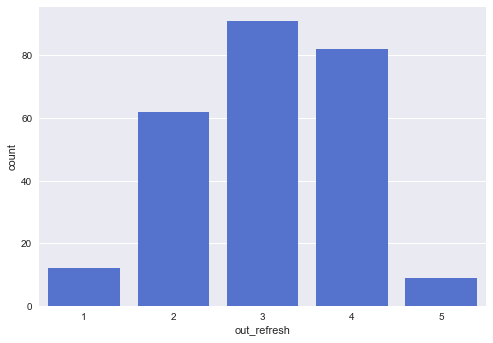

In [47]:
sns.countplot(x="out_refresh",  data=df, color= 'royalblue');

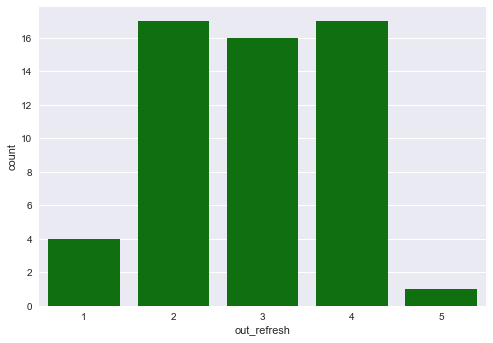

In [48]:
sns.countplot(x="out_refresh",  data=df[(df['treat']== 1) & (df['snooze'] == 1)], color= 'green');

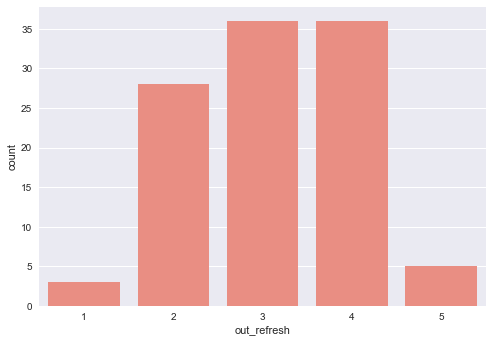

In [49]:
sns.countplot(x="out_refresh",  data=df[(df['treat']== 0) & (df['snooze'] == 0)], color= 'salmon');

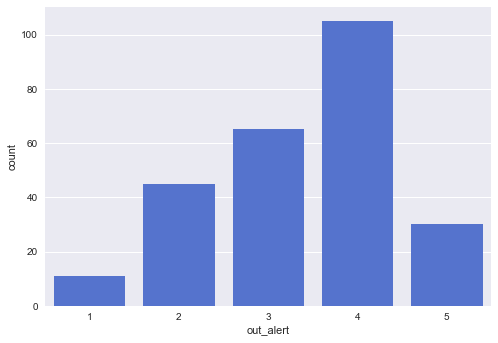

In [50]:
sns.countplot(x="out_alert",  data=df, color= 'royalblue');

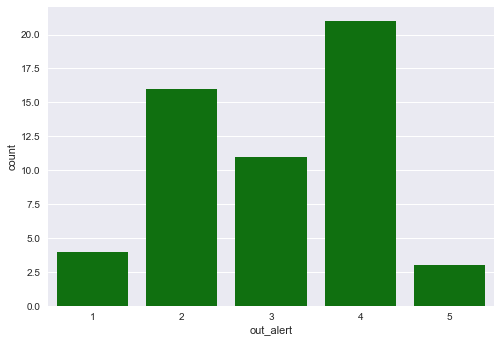

In [51]:
sns.countplot(x="out_alert",  data=df[(df['treat']== 1) & (df['snooze'] == 1)], color= 'green');

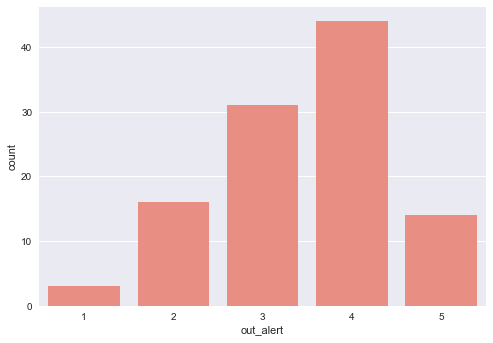

In [52]:
sns.countplot(x="out_alert",  data=df[(df['treat']== 0) & (df['snooze'] == 0)], color= 'salmon');

In [53]:
df['treat_name'] = np.where(df.treat == 1,"Treatment","Control")

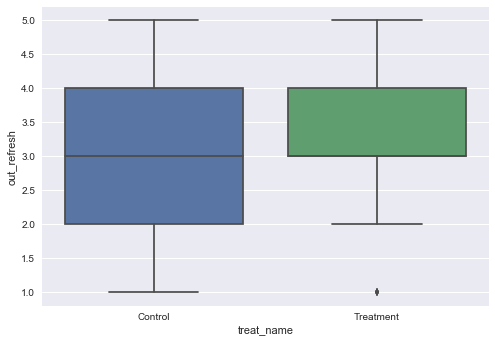

In [54]:
sns.boxplot(x = 'treat_name', y = 'out_refresh', data= df)

In [55]:
df.columns

Index(['respondent_id', 'date', 'treat', 'cat_country', 'age', 'avg_sleep',
       'cat_avg_alarms', 'cat_noisy_roomies', 'cat_insomnia', 'cat_room_light',
       'cat_traffic_noise', 'cat_kid_under_4', 'cat_house_type',
       'cat_profession_group', 'cat_deep_sleeper', 'cat_alarm_nearby',
       'How many alarms did it take to wake up?', 'snooze', 'hours_slept',
       'activity_yesterday', 'stress_yesterday', 'is_saturday', 'is_sunday',
       'is_weekend', 'out_refresh', 'out_alert', 'treat_name'],
      dtype='object')

In [56]:
table = np.round(pd.pivot_table(df,index=["date"],columns=["treat"],values=["age", "avg_sleep", "cat_deep_sleeper"],
               aggfunc= np.mean),2)
table

age        avg_sleep       cat_deep_sleeper      
treat         0      1         0     1                0     1
date                                                         
11/29/18  31.23  36.92      6.99  7.00             0.71  0.62
11/30/18  38.84  31.87      6.88  7.16             0.63  0.81
12/1/18   35.08  34.59      7.04  6.83             0.92  0.64
12/2/18   34.09  39.09      6.90  7.04             0.65  0.83
12/3/18   36.19  39.50      6.86  6.94             0.69  0.71
12/4/18   34.00  38.65      7.15  6.66             0.82  0.53
12/5/18   34.29  40.47      7.29  6.72             0.64  0.67
12/6/18   33.17  32.31      6.92  7.21             0.58  0.75

In [57]:
import scipy.stats
scipy.stats.ttest_ind(df[(df.treat == 1) & (df.date == '11/29/18')]['avg_sleep'], df[(df.treat == 0) & (df.date == '11/29/18')]['avg_sleep'], equal_var = False)

Ttest_indResult(statistic=0.03795212002997006, pvalue=0.9701188943184693)

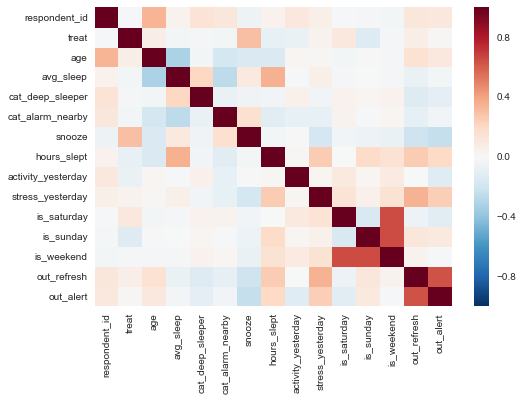

In [58]:
sns.heatmap(df.corr())

In [59]:
len(df[(df.treat == 0) & (df['snooze'] == 1)])

20

In [60]:
len(df[(df.treat == 1) & (df['snooze'] == 0)])

73

In [61]:
len(df[(df.treat == 1) & (df['snooze'] == 1)])

55

In [62]:
len(df[(df.treat == 0) & (df['snooze'] == 0)])

108

Creating variables to track compliance

In [63]:
def compliance(x):
    if x['treat'] == x['snooze']:
        return 1
    else:
        return 0

def never_taker(x):
    if (x['treat'] == 1) & (x['snooze'] == 0):
        return 1
    elif (x['treat'] == 0) & (x['snooze'] == 0):
        return 1
    else:
        return 0

In [64]:
df['complier'] = df.apply(compliance, axis= 1)
df['never_taker'] = df.apply(never_taker, axis = 1)

In [65]:
df.complier.sum()

163

In [66]:
df.never_taker.sum()

181

In [67]:
from linearmodels.panel import PanelOLS
from linearmodels.datasets import wage_panel
import statsmodels.api as sm
from linearmodels.panel.results import PanelModelComparison

In [69]:
# df.set_index(['name', pd.to_datetime(df['date'],format='%m/%d/%Y')], inplace=True) 
df1 = df.set_index(['respondent_id', pd.to_datetime(df['date'],format='%m/%d/%y')]) 

In [70]:
df1.head()

,,date,treat,cat_country,age,avg_sleep,cat_avg_alarms,cat_noisy_roomies,cat_insomnia,cat_room_light,cat_traffic_noise,...,activity_yesterday,stress_yesterday,is_saturday,is_sunday,is_weekend,out_refresh,out_alert,treat_name,complier,never_taker
respondent_id,date,,,,,,,,,,,,,,,,,,,,,
2,2018-11-29,11/29/18,0,USA,27.0,8.0,2,No,No,Medium,No,...,0,5,0,0,0,3,3,Control,1,1
3,2018-11-29,11/29/18,0,USA,27.0,7.5,2,Yes,No,Medium,No,...,0,2,0,0,0,2,4,Control,0,0
4,2018-11-29,11/29/18,0,USA,29.0,6.0,1,No,No,Low,Yes,...,0,2,0,0,0,3,3,Control,1,1
5,2018-11-29,11/29/18,0,USA,25.0,8.5,1,No,No,Medium,No,...,1,4,0,0,0,1,2,Control,1,1
6,2018-11-29,11/29/18,0,USA,25.0,6.0,2,No,No,Medium,No,...,1,2,0,0,0,3,2,Control,0,0


## Modeling

We will be building two sets of models:
* first with alertness as the outcome measure
* second with freshness as the outcome measure

Looking at the distributions of both the outcome measures, I feel that there is a better chance of seeing a difference for the alertness model and hence that is the hypothesis we will test first. We will only then look at the models for freshness. We will use Bonferroni corrections for testing multiple hypothesis.

### Model 1: Alertness

Let's see a comparison of models when we take the entire dataset and when we take just the set of compliers (CACE)

#### Initially checking without any covariates

In [71]:
mod_alert_overall = PanelOLS.from_formula('out_alert ~ 1 + treat + EntityEffects', data = df1).fit()
mod_alert_compliers = PanelOLS.from_formula('out_alert ~ 1 + treat + EntityEffects', data = df1[df1.complier ==1]).fit()

In [72]:
print(PanelModelComparison({'All data': mod_alert_overall, 'Compliers': mod_alert_compliers},))

                   Model Comparison                  
                              All data      Compliers
-----------------------------------------------------
Dep. Variable                out_alert      out_alert
Estimator                     PanelOLS       PanelOLS
No. Observations                   256            163
Cov. Est.                   Unadjusted     Unadjusted
R-squared                    5.519e-05         0.0508
R-Squared (Within)           5.519e-05         0.0508
R-Squared (Between)            -0.0034         0.0361
R-Squared (Overall)            -0.0002         0.0342
F-statistic                     0.0116         6.4181
P-value (F-stat)                0.9142         0.0126
=====================     ============   ============
Intercept                       3.3896         3.4775
                              (38.543)       (36.781)
treat                          -0.0137        -0.4515
                             (-0.1079)      (-2.5334)
======================= ====

In [73]:
mod_alert_compliers

Dep. Variable:,out_alert,R-squared:,0.0508
Estimator:,PanelOLS,R-squared (Between):,0.0361
No. Observations:,163,R-squared (Within):,0.0508
Date:,"Wed, Dec 12 2018",R-squared (Overall):,0.0342
Time:,21:05:44,Log-likelihood,-194.74
Cov. Estimator:,Unadjusted,,
,,F-statistic:,6.4181
Entities:,44,P-value,0.0126
Avg Obs:,3.7045,Distribution:,"F(1,120)"
Min Obs:,0.0000,,
Max Obs:,7.0000,F-statistic (robust):,6.4181


#### Now checking with covariates

In [74]:
mod_alert_overall_cov = PanelOLS.from_formula('out_alert ~ 1 + treat + hours_slept + C(activity_yesterday) + stress_yesterday + C(is_weekend) + EntityEffects', data = df1).fit()
mod_alert_compliers_cov = PanelOLS.from_formula('out_alert ~ 1 + treat + hours_slept + C(activity_yesterday) + stress_yesterday + C(is_weekend) + EntityEffects', data = df1[df1.complier ==1]).fit()

In [75]:
print(PanelModelComparison({'All data': mod_alert_overall_cov, 'Compliers': mod_alert_compliers_cov}))

                      Model Comparison                      
                                     All data      Compliers
------------------------------------------------------------
Dep. Variable                       out_alert      out_alert
Estimator                            PanelOLS       PanelOLS
No. Observations                          256            163
Cov. Est.                          Unadjusted     Unadjusted
R-squared                              0.0622         0.1181
R-Squared (Within)                     0.0622         0.1181
R-Squared (Between)                    0.1882         0.1340
R-Squared (Overall)                    0.0885         0.1239
F-statistic                            2.7443         3.1069
P-value (F-stat)                       0.0201         0.0114
============================     ============   ============
Intercept                              2.3195         2.4785
                                     (6.3999)       (5.0639)
C(activity_yesterday)[T.

In [76]:
print(mod_alert_compliers_cov.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:              out_alert   R-squared:                        0.1181
Estimator:                   PanelOLS   R-squared (Between):              0.1340
No. Observations:                 163   R-squared (Within):               0.1181
Date:                Wed, Dec 12 2018   R-squared (Overall):              0.1239
Time:                        21:05:48   Log-likelihood                   -188.75
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3.1069
Entities:                          44   P-value                           0.0114
Avg Obs:                       3.7045   Distribution:                   F(5,116)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             3.1069
                            

In [77]:
mod_alert_compliers = PanelOLS.from_formula('out_alert ~ treat + EntityEffects', data = df1[df1.complier ==1]).fit()

In [78]:
mod_alert_compliers.summary

Dep. Variable:,out_alert,R-squared:,0.0508
Estimator:,PanelOLS,R-squared (Between):,-0.0717
No. Observations:,163,R-squared (Within):,0.0508
Date:,"Wed, Dec 12 2018",R-squared (Overall):,-0.0824
Time:,21:05:48,Log-likelihood,-194.74
Cov. Estimator:,Unadjusted,,
,,F-statistic:,6.4181
Entities:,44,P-value,0.0126
Avg Obs:,3.7045,Distribution:,"F(1,120)"
Min Obs:,0.0000,,
Max Obs:,7.0000,F-statistic (robust):,6.4181


### Model 2: Freshness

Let's see a comparison of models when we take the entire dataset and when we take just the set of compliers (CACE)

#### Initially checking without any covariates

In [79]:
mod_refresh_overall = PanelOLS.from_formula('out_refresh ~ 1 + treat + EntityEffects', data = df1).fit()
mod_refresh_compliers = PanelOLS.from_formula('out_refresh ~ 1 + treat + EntityEffects', data = df1[df1.complier ==1]).fit()

In [80]:
PanelModelComparison({'All data': mod_refresh_overall, 'Compliers': mod_refresh_compliers})

,All data,Compliers
Dep. Variable,out_refresh,out_refresh
Estimator,PanelOLS,PanelOLS
No. Observations,256,163
Cov. Est.,Unadjusted,Unadjusted
R-squared,0.0018,0.0157
R-Squared (Within),0.0018,0.0157
R-Squared (Between),0.0152,0.0059
R-Squared (Overall),0.0036,0.0118
F-statistic,0.3749,1.9109
P-value (F-stat),0.5410,0.1694


#### Now checking with covariates

In [81]:
mod_refresh_overall_cov = PanelOLS.from_formula('out_refresh ~ 1 + treat + hours_slept + C(activity_yesterday) + stress_yesterday + C(is_weekend) + EntityEffects', data = df1).fit()
mod_refresh_compliers_cov = PanelOLS.from_formula('out_refresh ~ 1 + treat + hours_slept + C(activity_yesterday) + stress_yesterday + C(is_weekend) + EntityEffects', data = df1[df1.complier ==1]).fit()

In [82]:
print(PanelModelComparison({'All data': mod_refresh_overall_cov, 'Compliers': mod_refresh_compliers_cov}))

                       Model Comparison                       
                                      All data       Compliers
--------------------------------------------------------------
Dep. Variable                      out_refresh     out_refresh
Estimator                             PanelOLS        PanelOLS
No. Observations                           256             163
Cov. Est.                           Unadjusted      Unadjusted
R-squared                               0.1911          0.1595
R-Squared (Within)                      0.1911          0.1595
R-Squared (Between)                     0.0033          0.2112
R-Squared (Overall)                     0.1332          0.1594
F-statistic                             9.7821          4.4037
P-value (F-stat)                        0.0000          0.0010
============================     =============   =============
Intercept                               1.0751          1.5787
                                      (3.5159)        (

## Power calculations

In [83]:
from statistics import mean, stdev
from math import sqrt
from statsmodels.stats.power import TTestIndPower

In [84]:
alpha = 0.05
power = 0.8
analysis = TTestIndPower()

In [85]:
from numpy import mean
from numpy import var

def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

#### Alertness Measure

In [86]:
treat = df[(df.treat == 1) & (df.snooze ==1) ]['out_alert']
control = df[(df.treat == 0)& (df.snooze ==0)]['out_alert']

cohens_d = cohend(treat, control)
print("Cohen's D for Alertness measure = ", cohens_d)

p = analysis.power(cohens_d, nobs1= 47, ratio=1.0, alpha= alpha)
print("power = ", p)

result = analysis.solve_power(cohens_d, power= power, nobs1= None, ratio = 1.0, alpha = alpha)
print("sample size required = %.3f" % result)

Cohen's D for Alertness measure =  -0.39782442920634037
power =  0.479484397827908
sample size required = 100.156


#### Refresh measure

In [87]:
treat = df[(df.treat == 1) & (df.snooze ==1) ]['out_refresh']
control = df[(df.treat == 0)& (df.snooze ==0)]['out_refresh']

cohens_d = cohend(treat, control)
print("Cohen's D for Alertness measure = ", cohens_d)

p = analysis.power(cohens_d, nobs1= 47, ratio=1.0, alpha= alpha)
print("power = ", p)

result = analysis.solve_power(cohens_d, power= power, nobs1= None, ratio = 1.0, alpha = alpha)
print("sample size required = %.3f" % result)

Cohen's D for Alertness measure =  -0.22966012437024436
power =  0.1964794738029779
sample size required = 298.586
